# Find Clusters and Make new Features: 

In [1]:
# imports:
import pandas as pd
import numpy as np
import wrangle as wr

# vizualizations
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# acquire the data: 
df = wr.acquire_water()

In [3]:
# prepare the data: 
df = wr.prep_water(df)

In [4]:
# bins
df = wr.safe_water(df)

In [6]:
# split the data
train, validate, test = wr.split_water(df)

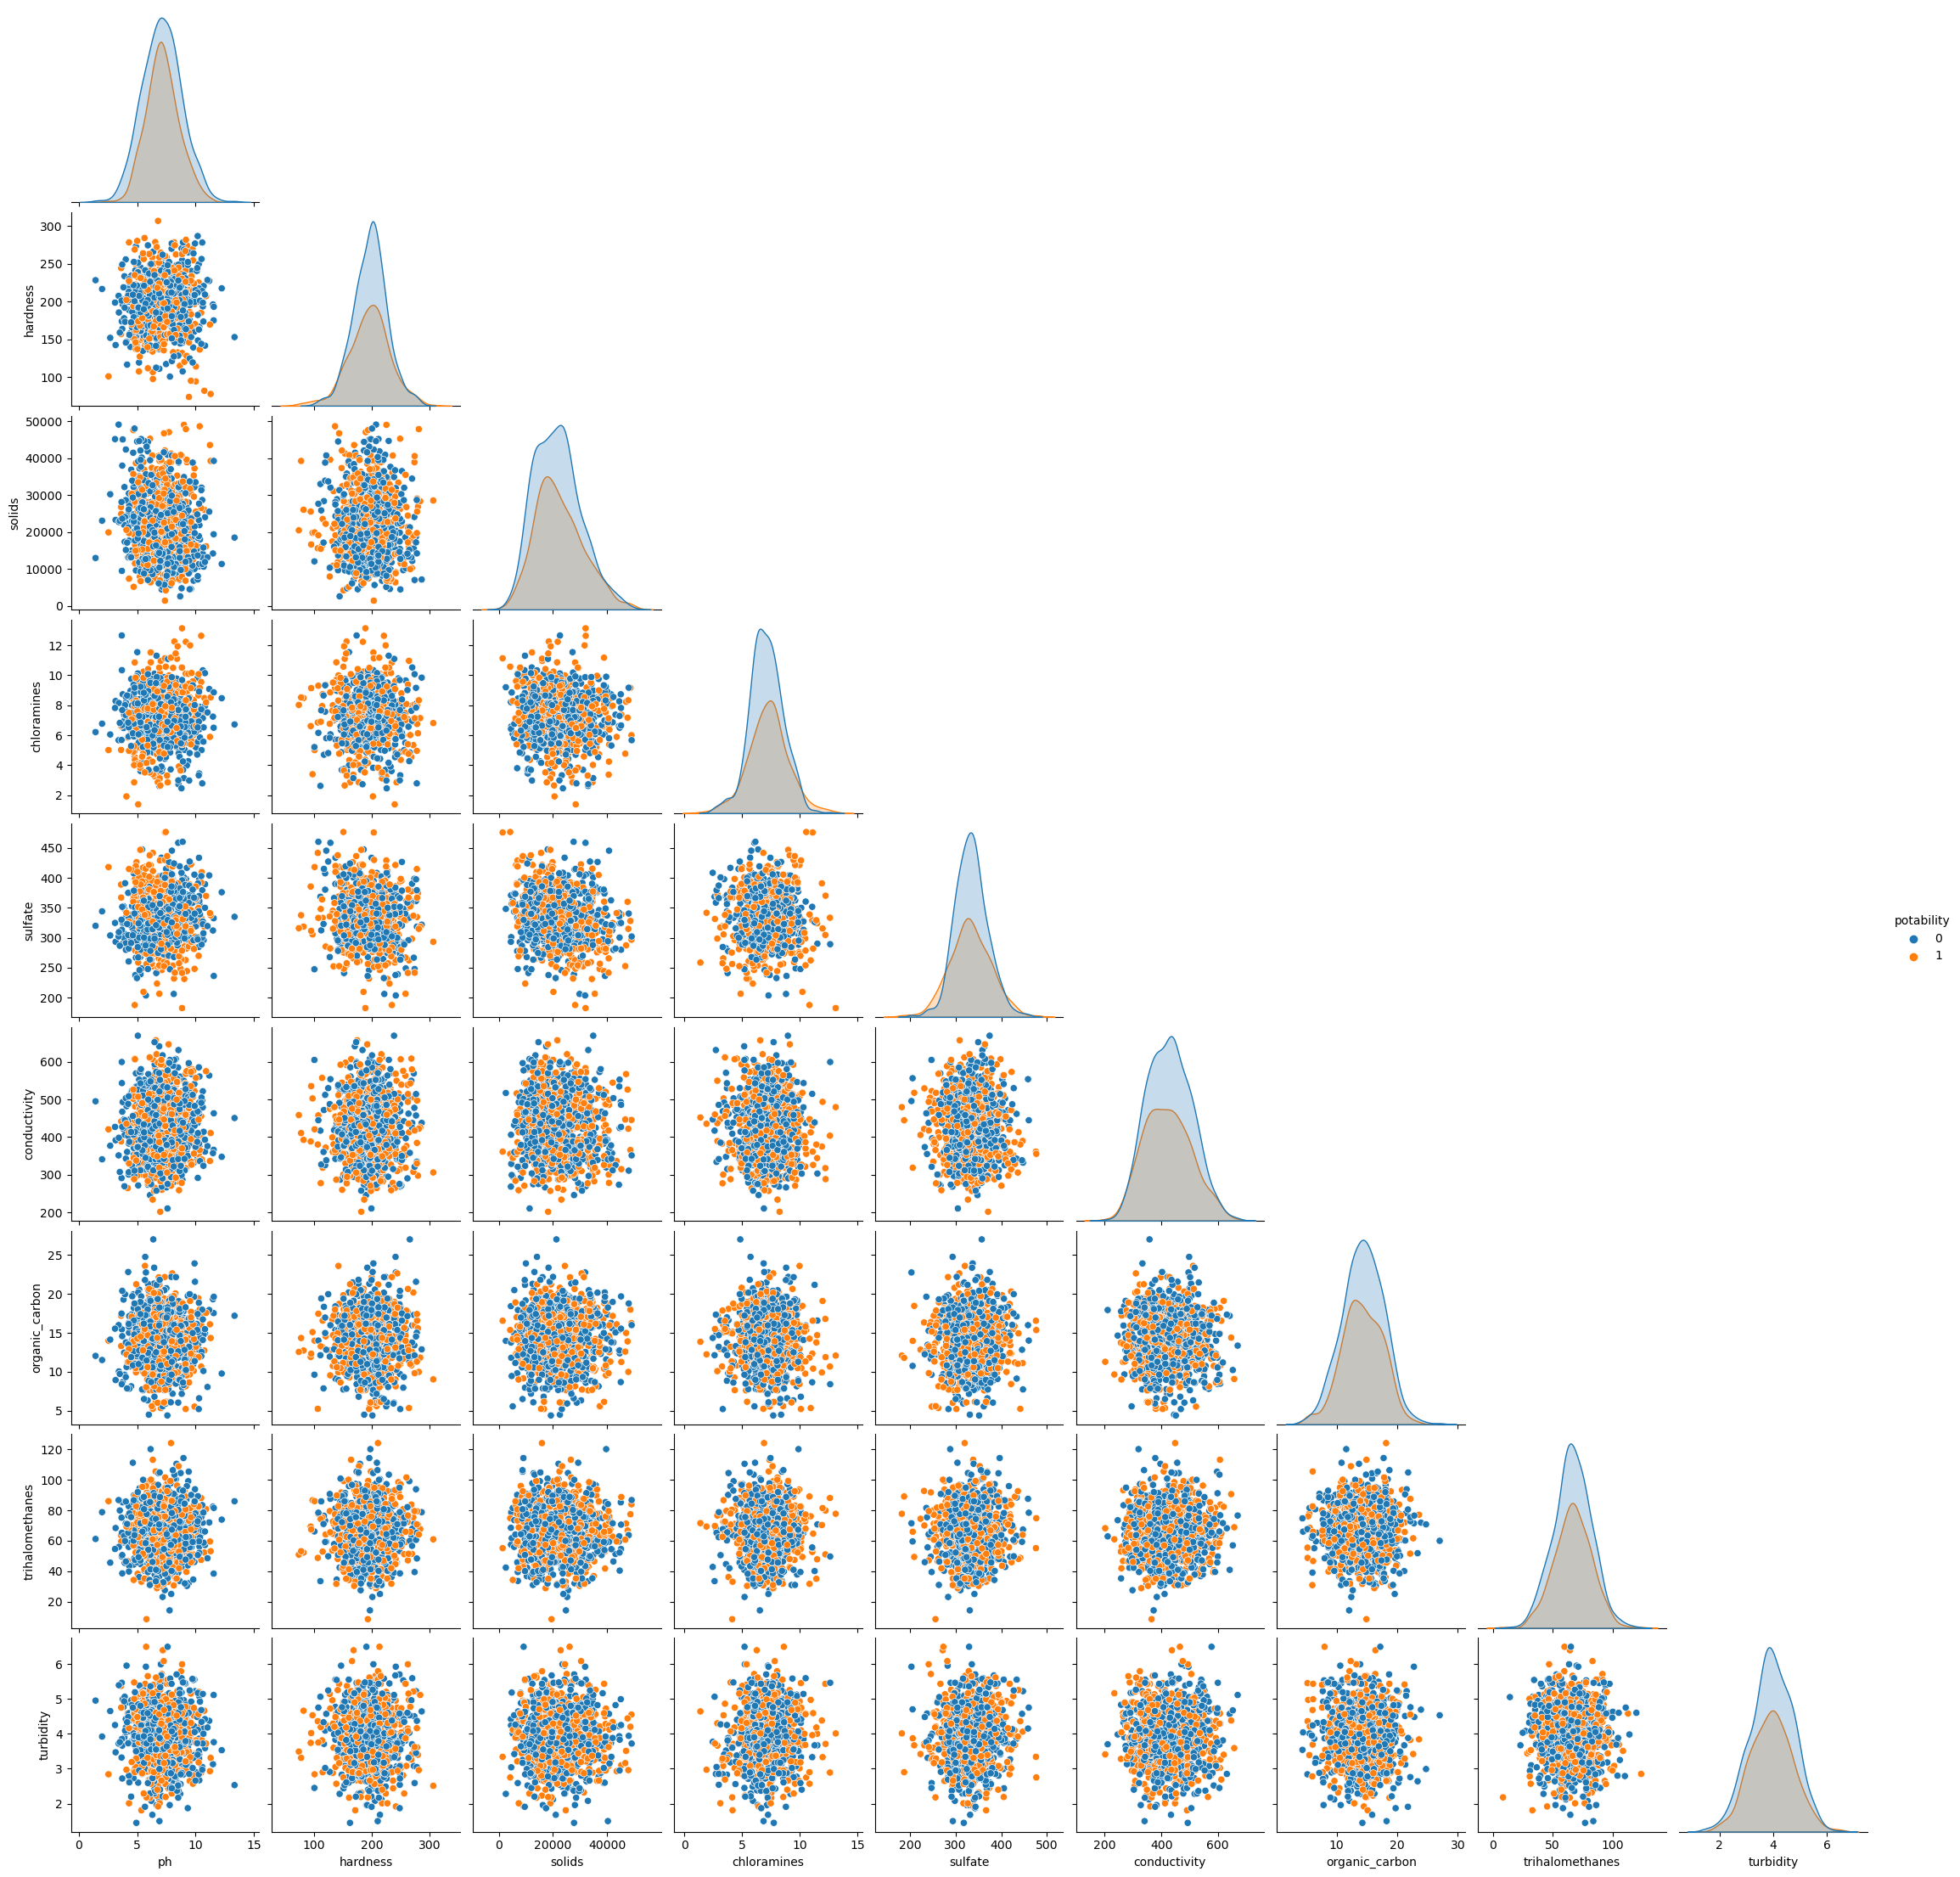

In [9]:
# look at the pair plot: 
sns.pairplot(data = train, hue = 'potability', corner = True);

# Each Scatter on their own:
- I will keep the ones that may have clusters, and delete the ones that don't

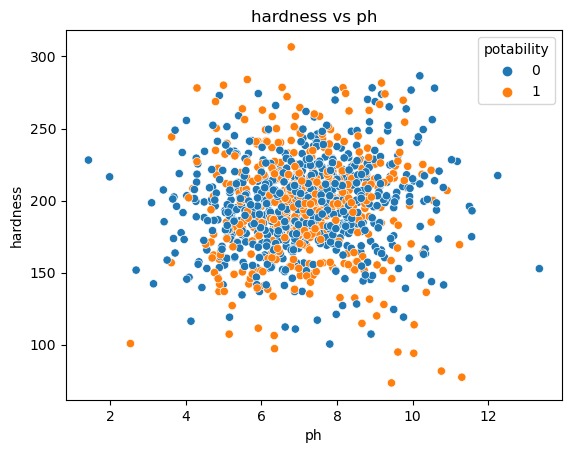

------


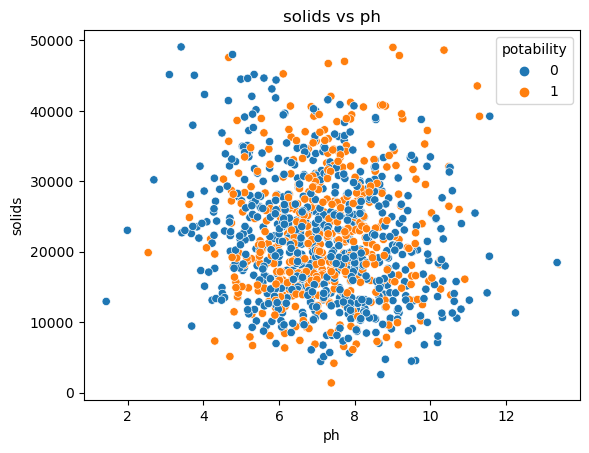

------


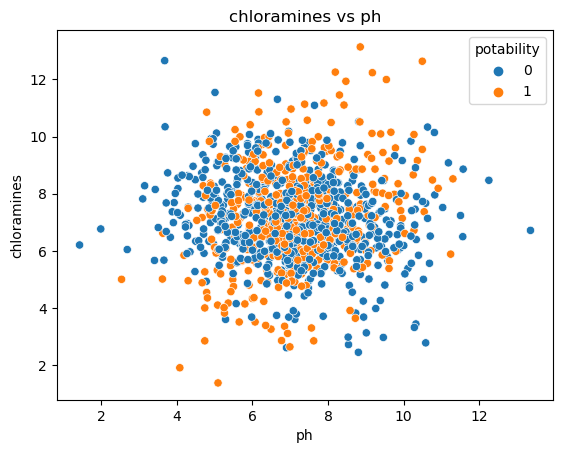

------


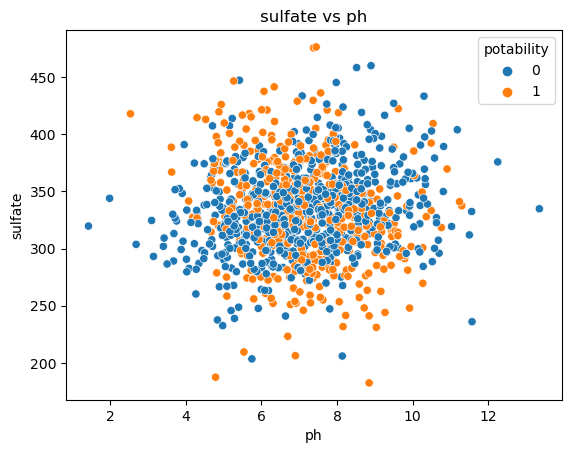

------


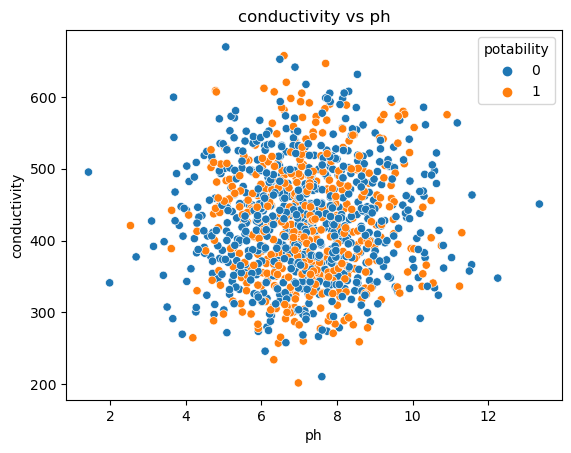

------


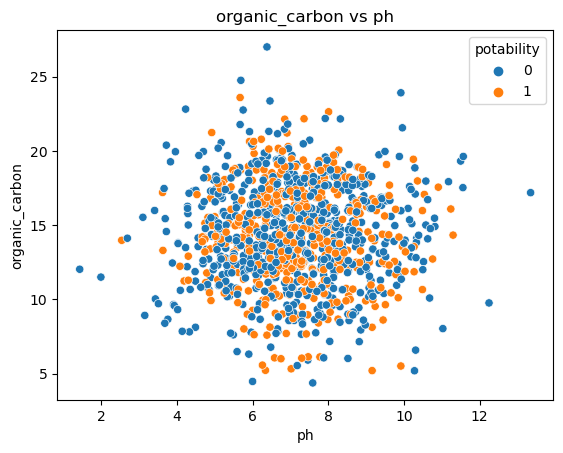

------


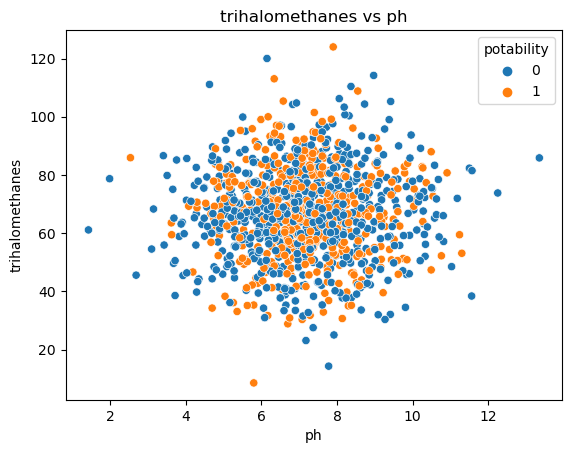

------


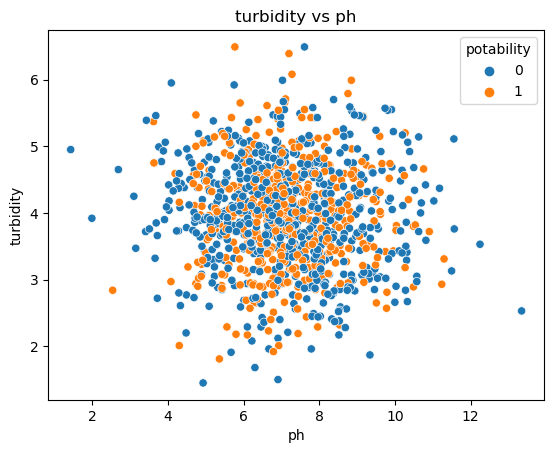

------


In [40]:
# ph
target = 'ph'
cols = ['hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = col , x = target, hue = 'potability')
        plt.title(f'{col} vs ph')
        plt.show()
        print("------")

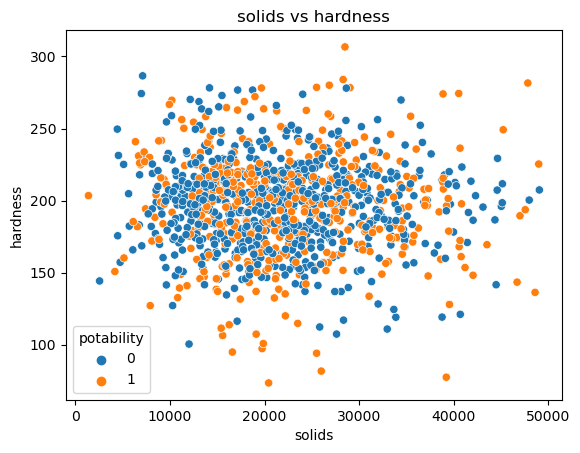

------


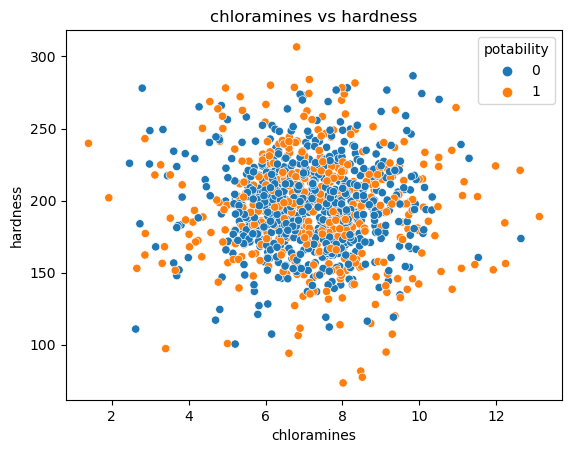

------


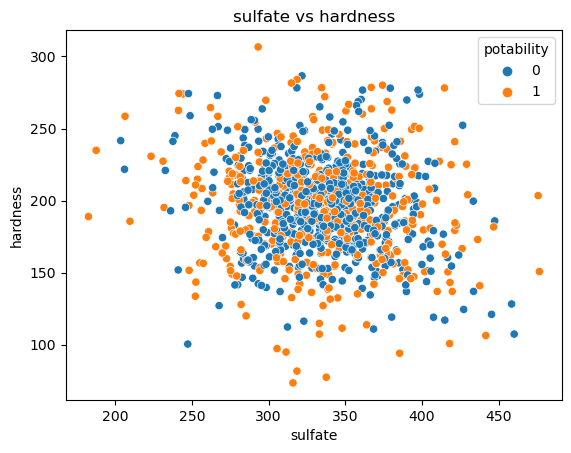

------


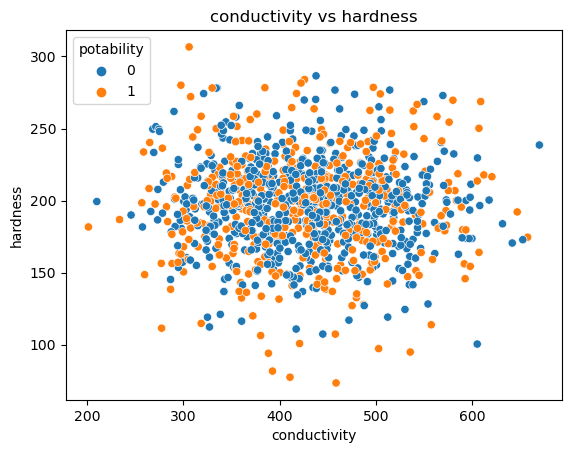

------


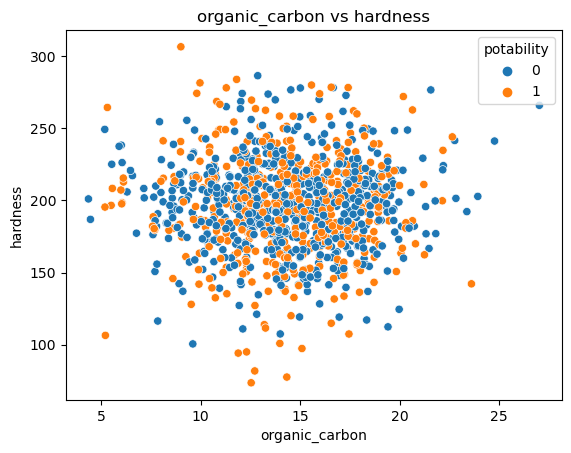

------


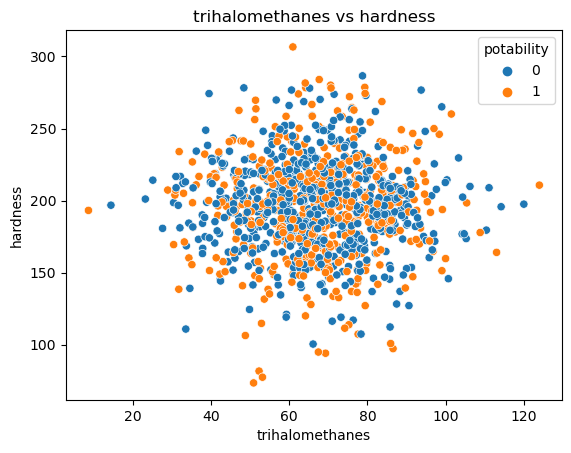

------


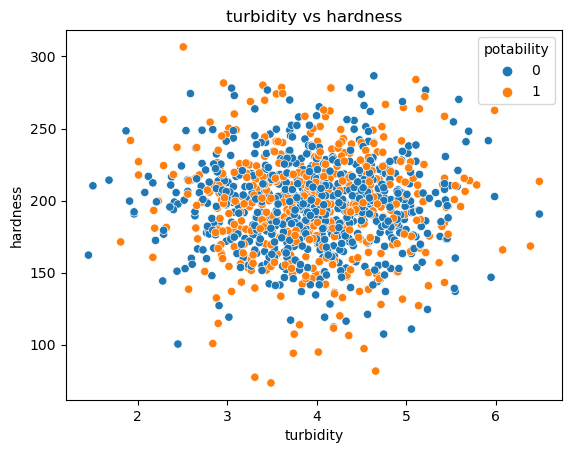

------


In [18]:
# hardness
target = 'hardness'
cols = ['solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs hardness')
        plt.show()
        print("------")

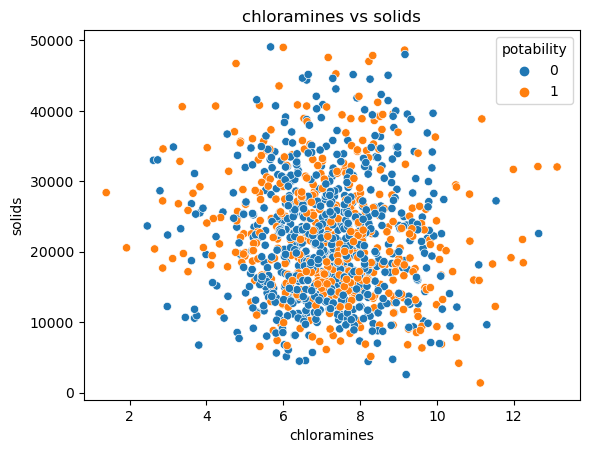

------


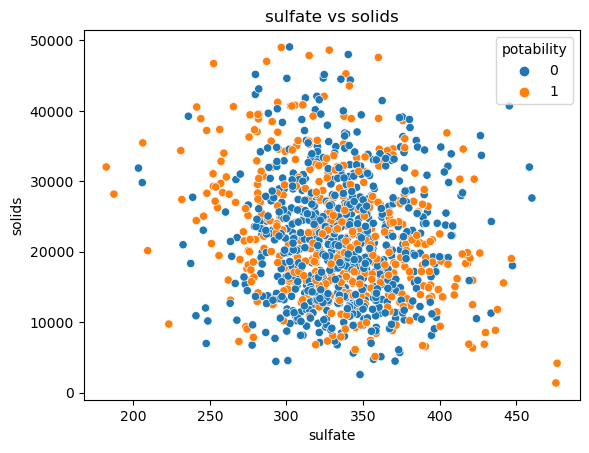

------


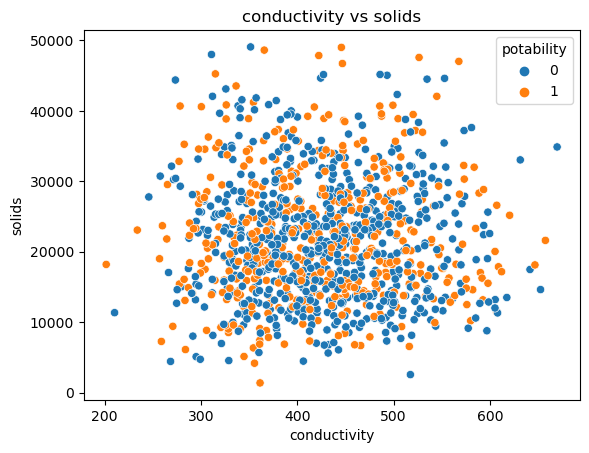

------


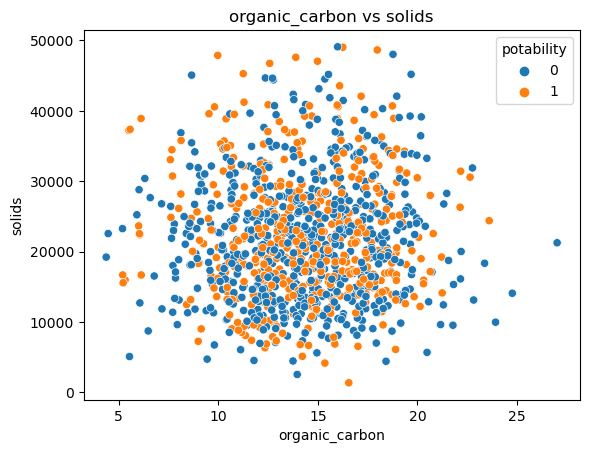

------


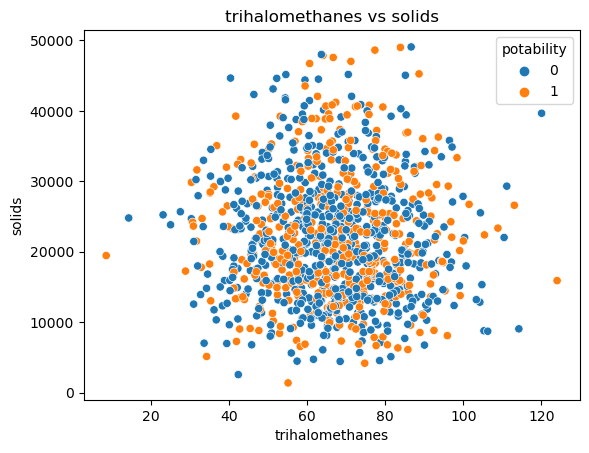

------


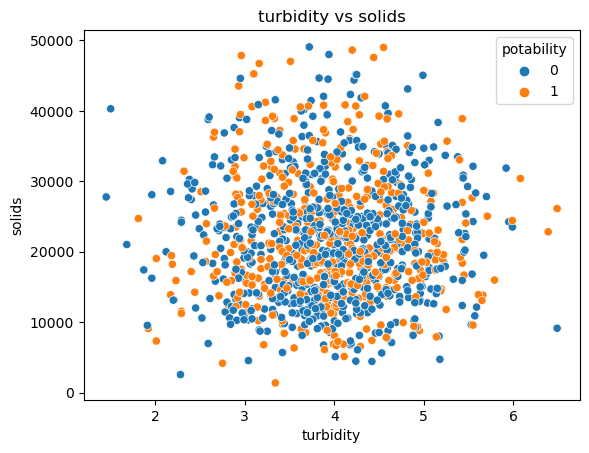

------


In [19]:
# solids
target = 'solids'
cols = ['chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs solids')
        plt.show()
        print("------")

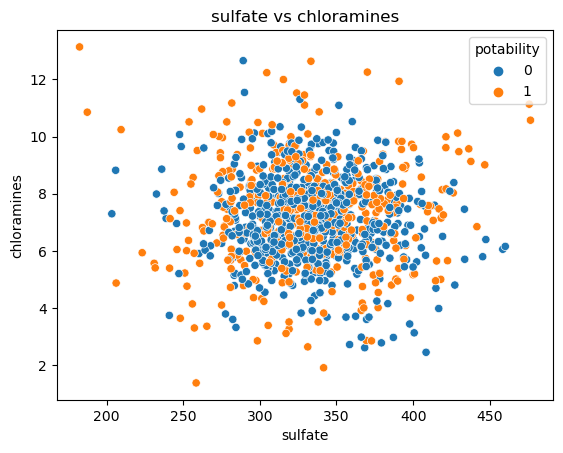

------


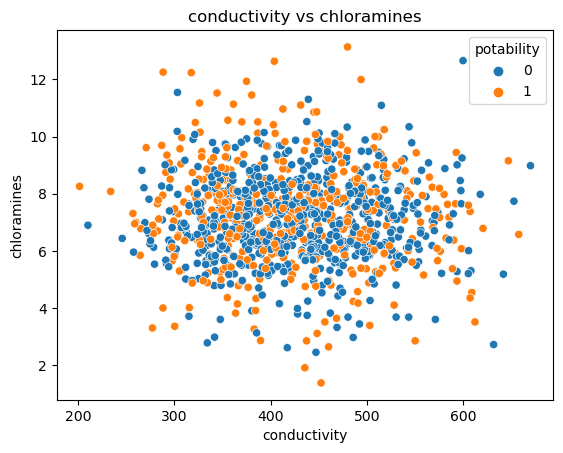

------


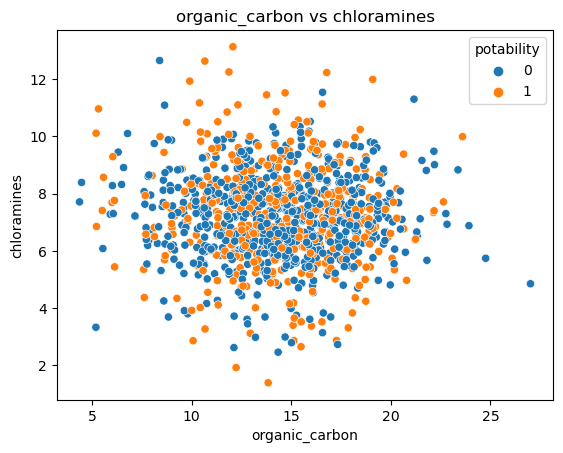

------


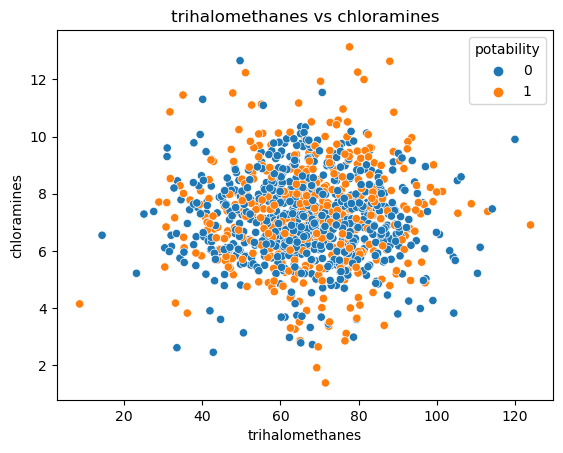

------


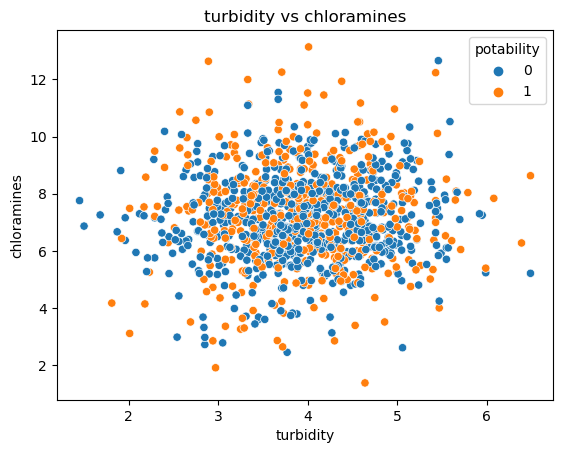

------


In [20]:
# chloramines
target = 'chloramines'
cols = ['sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs chloramines')
        plt.show()
        print("------")

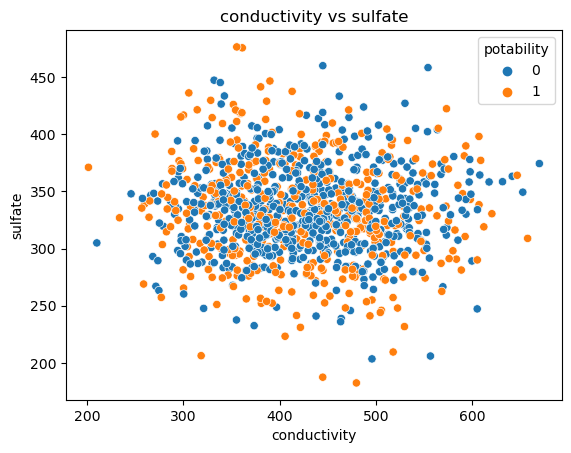

------


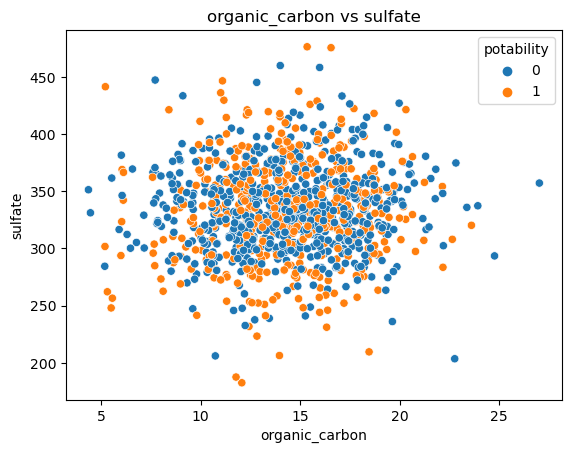

------


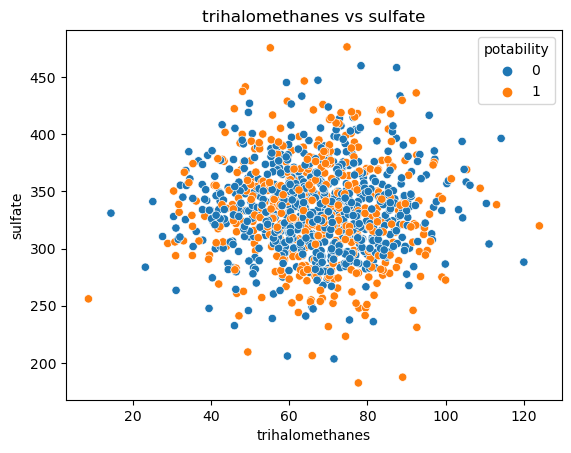

------


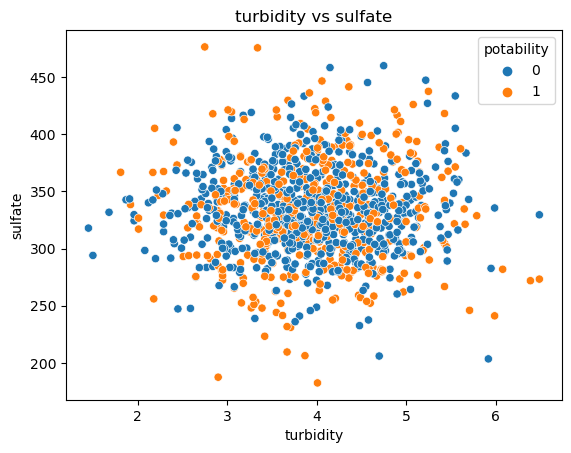

------


In [21]:
# sulfate
target = 'sulfate'
cols = ['conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs sulfate')
        plt.show()
        print("------")

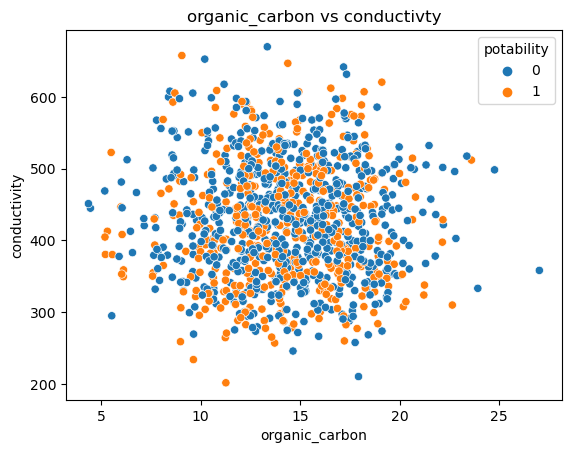

------


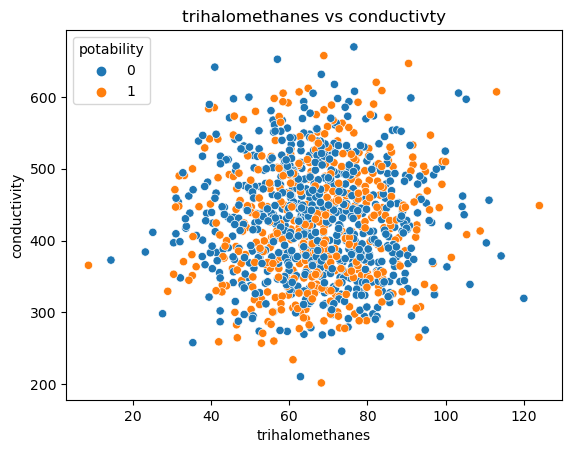

------


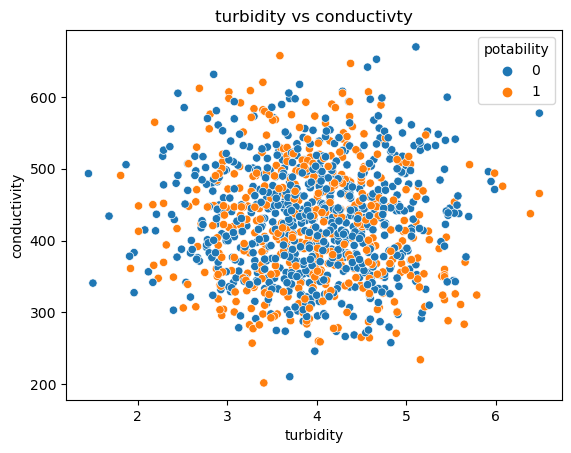

------


In [23]:
# conductivity
target = 'conductivity'
cols = ['organic_carbon', 'trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs conductivty')
        plt.show()
        print("------")

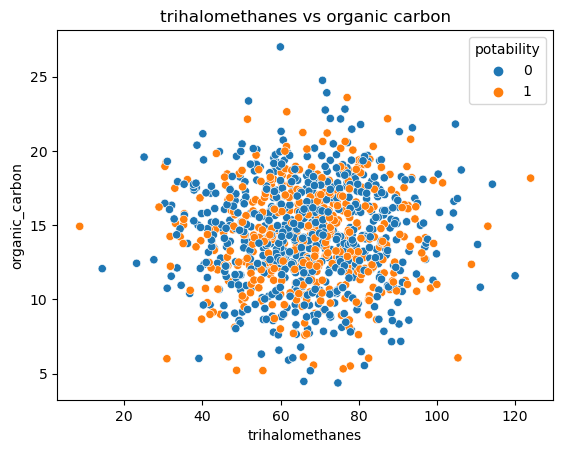

------


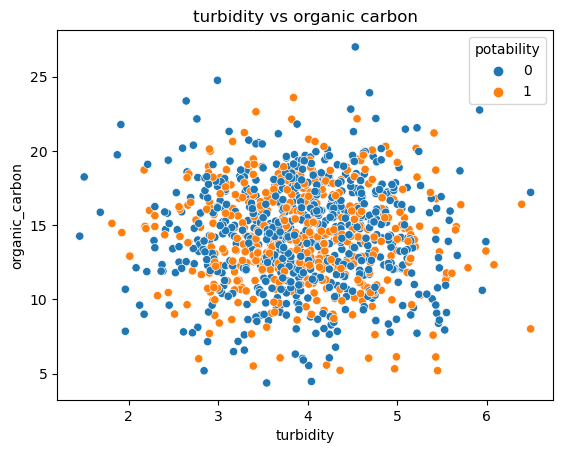

------


In [25]:
# organic_carbon
target = 'organic_carbon'
cols = ['trihalomethanes', 'turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs organic carbon')
        plt.show()
        print("------")

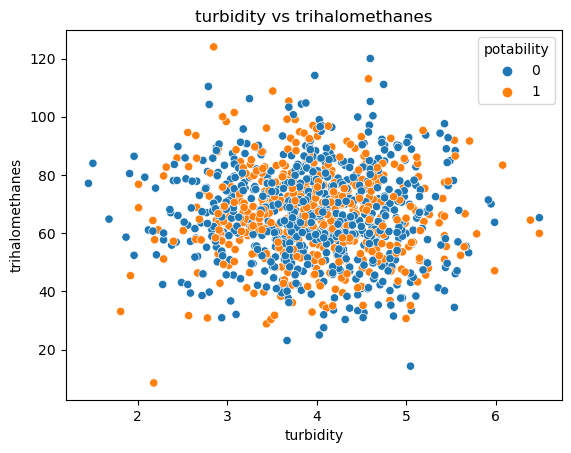

------


In [27]:
# trihalomethanes
target = 'trihalomethanes'
cols = ['turbidity']
for col in cols: 
        sns.scatterplot(data = train, y = target, x = col, hue = 'potability')
        plt.title(f'{col} vs trihalomethanes')
        plt.show()
        print("------")

### Potential Clusters: 
1. hardneess vs ph
2. solids vs ph
3. chloramines vs ph
4. sulfate vs ph
5. organic carbon vs ph
6. sulfate vs chloramines
7. organic carbon vs chloramines
8. turbidity vs chloramines

# Lets make those clusters: 

In [28]:
# imports: 
from sklearn.cluster import KMeans

In [29]:
# functions to create clusters and scatter-plot:


def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return dataframe (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    df['cluster'] = kmeans.predict(X_scaled)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return df, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,df,kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')


### Cluster 1: harness vs ph

In [65]:
X1 = train[['sulfate', 'ph', 'potability']]

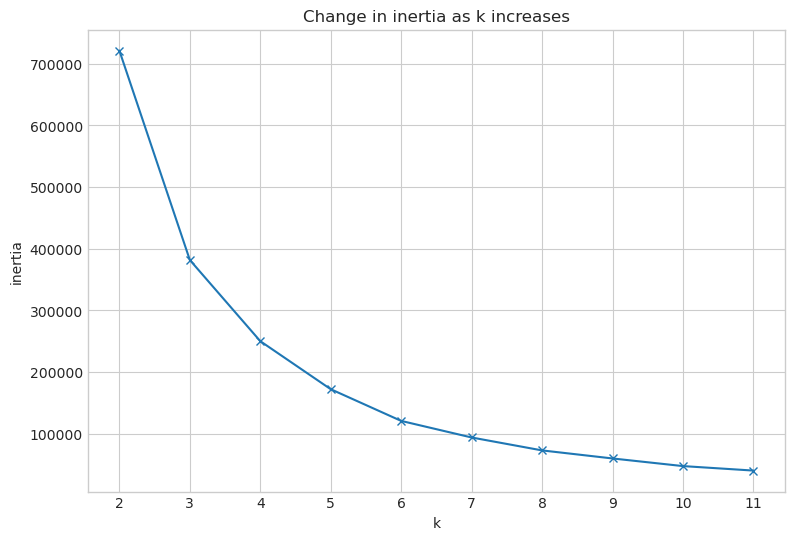

In [66]:
# let us explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [68]:
# create the clusters: 
kmeans = KMeans(n_clusters = 4)

#Fit the thing: 
kmeans.fit(X1)

#Use (Predict using) the thing
kmeans.predict(X1)

array([2, 3, 2, ..., 3, 0, 3], dtype=int32)

#### Add clusters too the data: 

In [69]:
train['cluster_1'] = kmeans.predict(X1)

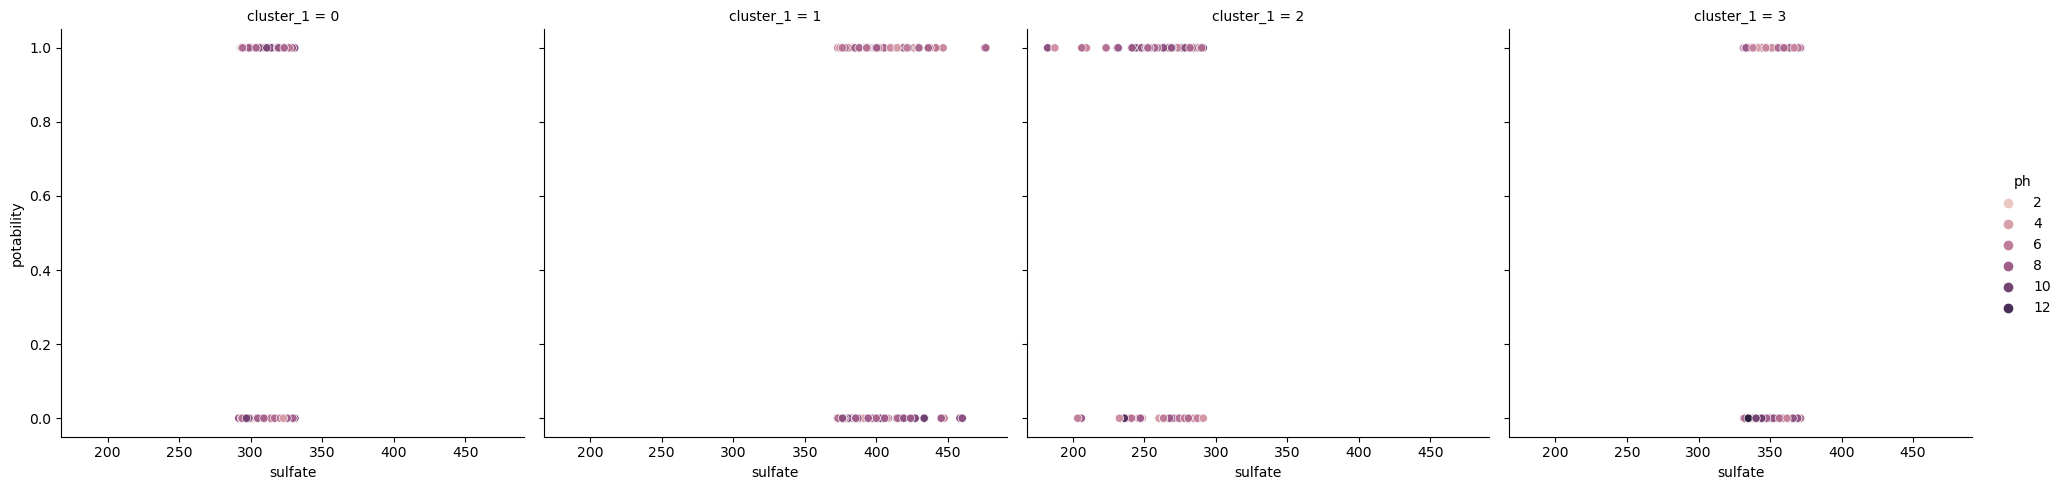

In [71]:
# visualize the clusters: 
sns.relplot(x = 'sulfate', y = 'potability', col='cluster_1', data = train, hue = 'ph');

<Axes: xlabel='sulfate', ylabel='ph'>

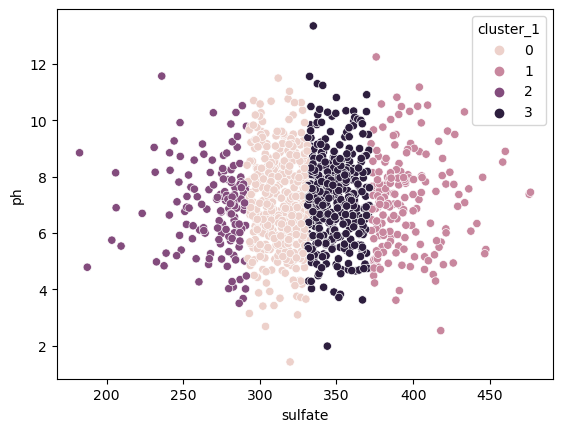

In [72]:
sns.scatterplot(data = train, x = 'sulfate', y = 'ph', hue= 'cluster_1')